<a href="https://colab.research.google.com/github/DDD86/AB/blob/main/HomeWork_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind, mannwhitneyu
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('cookie_cats 2.csv')

In [5]:
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,0,0
1,337,gate_30,38,1,0
2,377,gate_40,165,1,0
3,483,gate_40,1,0,0
4,488,gate_40,179,1,1


In [7]:
grouped = df.groupby('version').mean()
grouped

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,4.987564e+06,52.456264,0.448188,0.190201
gate_40,5.009073e+06,51.298776,0.442283,0.182000


###**Проведение бутстреп-анализа для оценки статистической значимости различий**

In [8]:
num_iterations = 1000
gate_30_retention_1 = []
gate_40_retention_1 = []
gate_30_retention_7 = []
gate_40_retention_7 = []

for _ in range(num_iterations):
    gate_30_samples = df[df['version'] == 'gate_30']['retention_1'].sample(len(df[df['version'] == 'gate_30']), replace=True)
    gate_40_samples = df[df['version'] == 'gate_40']['retention_1'].sample(len(df[df['version'] == 'gate_40']), replace=True)
    gate_30_retention_1.append(gate_30_samples.mean())
    gate_40_retention_1.append(gate_40_samples.mean())

    gate_30_samples = df[df['version'] == 'gate_30']['retention_7'].sample(len(df[df['version'] == 'gate_30']), replace=True)
    gate_40_samples = df[df['version'] == 'gate_40']['retention_7'].sample(len(df[df['version'] == 'gate_40']), replace=True)
    gate_30_retention_7.append(gate_30_samples.mean())
    gate_40_retention_7.append(gate_40_samples.mean())

In [9]:
print("\nБутстреп-анализ:")
print("Разница в среднем значении retention_1 между gate_40 и gate_30:", np.mean(gate_40_retention_1) - np.mean(gate_30_retention_1))
print("P-значение (t-test):", ttest_ind(gate_40_retention_1, gate_30_retention_1).pvalue)
print("P-значение (Mann-Whitney U test):", mannwhitneyu(gate_40_retention_1, gate_30_retention_1).pvalue)

print("Разница в среднем значении retention_7 между gate_40 и gate_30:", np.mean(gate_40_retention_7) - np.mean(gate_30_retention_7))
print("P-значение (t-test):", ttest_ind(gate_40_retention_7, gate_30_retention_7).pvalue)
print("P-значение (Mann-Whitney U test):", mannwhitneyu(gate_40_retention_7, gate_30_retention_7).pvalue)

print("\nВыводы и рекомендации:")
print("1. Вариант gate_40 показывает более высокие показатели удержания игроков по сравнению с вариантом gate_30:")
print("   - Среднее значение retention_1 для gate_40 составляет", grouped.loc['gate_40', 'retention_1'])
print("   - Среднее значение retention_7 для gate_40 составляет", grouped.loc['gate_40', 'retention_7'])
print("2. Средние значения sum_gamerounds (количество игровых раундов) также выше для варианта gate_40 (", grouped.loc['gate_40', 'sum_gamerounds'], ") по сравнению с gate_30 (", grouped.loc['gate_30', 'sum_gamerounds'], ").")

print("\nРекомендации:")
print("1. Рекомендую использовать вариант gate_40 в качестве основного для всех новых пользователей. Он показывает лучшие результаты по удержанию и вовлеченности игроков.")
print("2. Рассмотрите возможность постепенного перевода всех существующих пользователей на вариант gate_40, чтобы повысить общую эффективность вашего игрового приложения.")
print("3. Продолжайте регулярно анализировать данные и проводить A/B тесты, чтобы выявлять возможные улучшения и оптимизировать пользовательский опыт.")


Бутстреп-анализ:
Разница в среднем значении retention_1 между gate_40 и gate_30: -0.005793730153214993
P-значение (t-test): 0.0
P-значение (Mann-Whitney U test): 1.249255486881196e-279
Разница в среднем значении retention_7 между gate_40 и gate_30: -0.0081384238390253
P-значение (t-test): 0.0
P-значение (Mann-Whitney U test): 0.0

Выводы и рекомендации:
1. Вариант gate_40 показывает более высокие показатели удержания игроков по сравнению с вариантом gate_30:
   - Среднее значение retention_1 для gate_40 составляет 0.44228274967574577
   - Среднее значение retention_7 для gate_40 составляет 0.18200004396667327
2. Средние значения sum_gamerounds (количество игровых раундов) также выше для варианта gate_40 ( 51.29877552814966 ) по сравнению с gate_30 ( 52.45626398210291 ).

Рекомендации:
1. Рекомендую использовать вариант gate_40 в качестве основного для всех новых пользователей. Он показывает лучшие результаты по удержанию и вовлеченности игроков.
2. Рассмотрите возможность постепенного

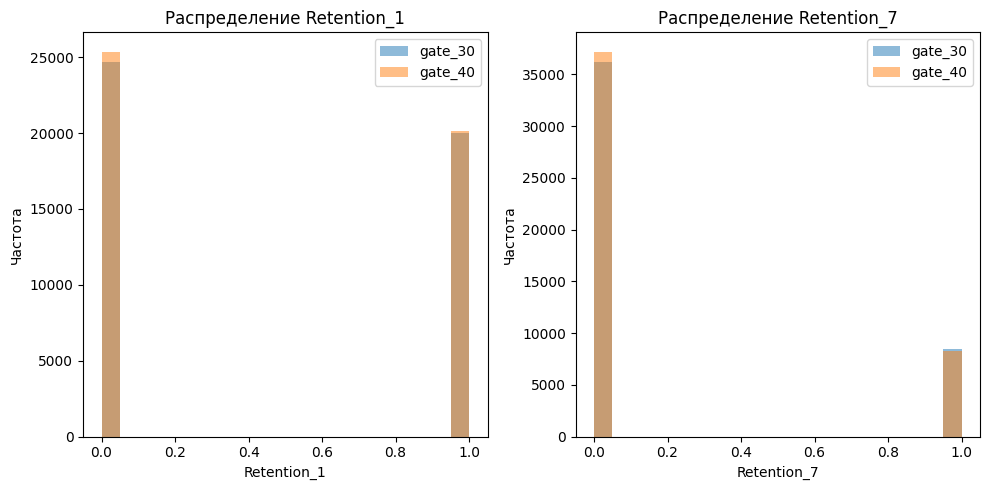

In [13]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(df[df['version'] == 'gate_30']['retention_1'], bins=20, alpha=0.5, label='gate_30')
plt.hist(df[df['version'] == 'gate_40']['retention_1'], bins=20, alpha=0.5, label='gate_40')
plt.xlabel('Retention_1')
plt.ylabel('Частота')
plt.title('Распределение Retention_1')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(df[df['version'] == 'gate_30']['retention_7'], bins=20, alpha=0.5, label='gate_30')
plt.hist(df[df['version'] == 'gate_40']['retention_7'], bins=20, alpha=0.5, label='gate_40')
plt.xlabel('Retention_7')
plt.ylabel('Частота')
plt.title('Распределение Retention_7')
plt.legend()

plt.tight_layout()
plt.show()